# Project: Investigate a Grapminder World Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# I.  Introduction

[Grapminder](https://www.gapminder.org/data/) gathers statistical data in different fields (society, economy, education, energy..ect) about how people live in their countries. Data are grouped by indicators. Every area of life has its properly indicators. Our investigation will be built on 9 indicators belonging to different areas (Society, Economy, Education, Poupulation and Health) to track world countries across the years.  We note that the data used here is the updated gapminder data.The indicators chosen  with their description are:

    
    
1.  corruption_perception_index:
Transaprency International's score of perceptions of corruption. Higher values indicate less corruption.
2.  democracy_score_use_as_color:
Overall polity score from the Polity IV dataset, calculated by subtracting an autocracy  score from a democracy score. It is a summary measure of a country's democratic and free nature. -10 is the lowest value, 10 the highest.
3.  hdi_human_development_index:
Human Development Index is an index used to rank countries by level of "human development". It contains three dimensions: health level, educational level and living standard.
4.  murder_per_100000_people:
Mortality due to interpersonal violence, per 100 000 standard population, age adjusted. This rate is calculated as if all countries had the same age composition of the population.
5.  military_expenditure_percent_of_gdp:
Military expenditures data from SIPRI are derived from the NATO definition, which includes all current and capital expenditures on the armed forces, including peacekeeping forces; defense ministries and other government agencies engaged in defense projects; paramilitary forces, if these are judged to be trained and equipped for military operations; and military space activities. Such expenditures include military and civil personnel, including retirement pensions of military personnel and social services for personnel; operation and maintenance; procurement; military research and development; and military aid (in the military expenditures of the donor country). Excluded are civil defense and current expenditures for previous military activities, such as for veterans' benefits, demobilization, conversion, and destruction of weapons. This definition cannot be applied for all countries, however, since that would require much more detailed information than is available about what is included in military budgets and off-budget military expenditure items. (For example, military budgets might or might not cover civil defense, reserves and auxiliary forces, police and paramilitary forces, dual-purpose forces such as military and civilian police, military grants in kind, pensions for military personnel, and social security contributions paid by one part of government to another.)
6.  gdp_total_yearly_growth:
Based on gapminder's GDP per capita, PPP
7.  mean_years_in_school_men_25_years_and_older:
The average number of years of school attended by all people in the age and gender group specified, including primary, secondary and tertiary education.
8.  mean_years_in_school_women_25_years_and_older
The average number of years of school attended by all people in the age and gender group specified, including primary, secondary and tertiary education.
9.  population_total:
Total population

To fit each country by the continent it belongs to, we downoald a **country-and-continent** cvs file from [this link](https://datahub.io/JohnSnowLabs/country-and-continent-codes-list) caontaining this information.

 There are some general questions to ask to conduct our investigation:

1. How corruption, human devloppement indexes varie by region 
2. How democratie grows by region across year.
3. The region that is witnessing the most to interpersonal violence?    
4. How gdp grows over years by region?
5. The area most spending on armaments?
6. Is there equality, equity and justice in education?    


 


In [2]:
# import packages

import pandas as pd
import numpy as np
import inspect
from functools import reduce
import matplotlib.pyplot as plt 
import seaborn as sns
import seaborn as sns
import numpy as np
%matplotlib inline

<a id='wrangling'></a>
# II.  Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

## II.1   General Properties

In [4]:
#  We import all the csv files necessary for the investigation

file1       =  'data/corruption_perception_index.csv'
file2       =  'data/democracy_score_use_as_color.csv'
file3       =  'data/hdi_human_development_index.csv'
file4       =  'data/murder_per_100000_people.csv'
file5       =  'data/military_expenditure_percent_of_gdp.csv'
file6       =  'data/gdp_total_yearly_growth.csv'
file7       =  'data/mean_years_in_school_men_25_years_and_older.csv'
file8       =  'data/mean_years_in_school_women_25_years_and_older.csv'
file9       =  'data/population_total.csv'
region_file =  'data/country-and-continent.csv'

cpi               = pd.read_csv(file1)
democ             = pd.read_csv(file2)
hdi               = pd.read_csv(file3)
murd              = pd.read_csv(file4)
militexp          = pd.read_csv(file5)
gdp               = pd.read_csv(file6)
years_in_school_m = pd.read_csv(file7)
years_in_school_w = pd.read_csv(file8)
population        = pd.read_csv(file9)

Country_Region    = pd.read_csv(region_file)


> **Comment**: After loading data, We print few lines from each indicator dataframe to read meta data and understood how indicators are measured.

In [154]:
 # print out a few lines
print('corruption perception index')
cpi.head()

corruption perception index


,geo,2012,2013,2014,2015,2016,2017
0,Afghanistan,8.0,8.0,12.0,11.0,15.0,15
1,Albania,33.0,31.0,33.0,36.0,39.0,38
2,Algeria,34.0,36.0,36.0,36.0,34.0,33
3,Angola,22.0,23.0,19.0,15.0,18.0,19
4,Argentina,35.0,34.0,34.0,32.0,36.0,39


In [155]:
print('Murder per 100000 people')
murd.head()


Murder per 100000 people


,geo,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.070,2.96,NaN,2.30,NaN,NaN,NaN,NaN,NaN,NaN
1,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.69,NaN,NaN,NaN,1.51,1.10,0.964,1.12,1.01
4,Australia,1.0,1.33,1.46,1.25,1.3,1.39,1.3,1.34,1.54,...,0.978,1.09,1.17,1.01,1.05,1.23,1.06,1.020,1.11,NaN


In [156]:
print('Population')
population.head()

Population


,geo,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,...,28000000,28800000,29700000,30700000,31700000,32800000,33700000,34700000,35500000,36400000
1,Albania,410000,412000,413000,414000,416000,417000,418000,420000,421000,...,2960000,2940000,2930000,2920000,2920000,2920000,2920000,2930000,2930000,2930000
2,Algeria,2500000,2510000,2520000,2530000,2540000,2550000,2560000,2570000,2580000,...,35500000,36100000,36800000,37600000,38300000,39100000,39900000,40600000,41300000,42000000
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,84500,84400,83800,82400,80800,79200,78000,77300,77000,77000
4,Angola,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,...,22500000,23400000,24200000,25100000,26000000,26900000,27900000,28800000,29800000,30800000


In [157]:
cpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
geo     177 non-null object
2012    172 non-null float64
2013    173 non-null float64
2014    171 non-null float64
2015    165 non-null float64
2016    173 non-null float64
2017    177 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 9.8+ KB


In [158]:
print('Indicator with no NaN value \n')
population.info()

Indicator with no NaN value 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 220 entries, geo to 2018
dtypes: int64(219), object(1)
memory usage: 335.2+ KB


> **Comment**: We see from heads that there are a lot of NaN values. This is because tracking data is not as easy in developing countries as it is in developed countries. Some indicators are recents as cpi index and others are very old as Population inedx.

## II.2  Merge all the  indicator dataframes
> Gathering indicator data in one data frame is an essential step to facilitate displaying data, to control them well and to provide fewer lines of code. 

> In the following cells we merge all the  indicator dataframes into one global dataframe. That is, the final datframe columns look like: [Country, Year, indicator1 , indicator2 ...]. First, we define necessary functions to the merge operation. Then we call the defined functions

In [159]:
def retrieve_name(var):
    """
    This finction returns the name of the variable var.
    We give it a variable automatically and it returns its name.
    We use this function to create a new column in the global datafrmae 
    with the given indicator dataframe name.
    The origine of this is in: https://stackoverflow.com/a/18425523
    """
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]

In [160]:
def slack_df(df,Col_name):
    """
    This function takes a dataframe df and reshapes it,
    'Col_name' is the name of the new column in the dataframe reshaped    
    """
    # set the 'geo' column as the index of the dataframe 
    df = df.set_index(['geo'])

    df = df.stack().reset_index(name='{}'.format(Col_name[0]))
    # rename level_1 column as Year
    df = df.rename(columns={'level_1':'Year'})
    return df

In [161]:
def merge_dfs(df1, df2):
    """ This function merges two dataframes. 
    """
    # merge df1 and df2 OUTERly, on two columns: Year and geo.
    res = pd.merge(df1, df2, how='outer', on = ['Year', 'geo'])
    return res

####   II.2.1- Reshape all  indicators dataframe and gather them into one list: dfs.

In [162]:
dfs= [slack_df(cpi,retrieve_name(cpi)),
slack_df(democ,retrieve_name(democ)),
slack_df(hdi,retrieve_name(hdi)),
slack_df(murd,retrieve_name(murd)),
slack_df(gdp,retrieve_name(gdp)),
slack_df(militexp,retrieve_name(militexp)),
slack_df(years_in_school_m,retrieve_name(years_in_school_m)),
slack_df(years_in_school_w,retrieve_name(years_in_school_w)),
slack_df(population,retrieve_name(population))]

# show resulted reshaped cpi dataframe
print('original cpi')
print(cpi.head())
print(' \n reshaped cpi')
print(slack_df(cpi,retrieve_name(cpi)).head())

original cpi
           geo  2012  2013  2014  2015  2016  2017
0  Afghanistan   8.0   8.0  12.0  11.0  15.0    15
1      Albania  33.0  31.0  33.0  36.0  39.0    38
2      Algeria  34.0  36.0  36.0  36.0  34.0    33
3       Angola  22.0  23.0  19.0  15.0  18.0    19
4    Argentina  35.0  34.0  34.0  32.0  36.0    39
 
 reshaped cpi
           geo  Year   cpi
0  Afghanistan  2012   8.0
1  Afghanistan  2013   8.0
2  Afghanistan  2014  12.0
3  Afghanistan  2015  11.0
4  Afghanistan  2016  15.0


#### II.2.2 Merge all dataframes in dfs list:
In this step, we use the reduce function to merge all dataframes at once
The reduce(fun,seq) function is used to apply a particular function passed in its argument to all of the list elements mentioned in the sequence passed  along.This function is defined in “functools” module.
Working : 
- At first step, first two elements of sequence are picked and the result is obtained.
- Next step is to apply the same function to the previously attained result and the number just succeeding the second element and the result is again stored.
- This process continues till no more elements are left in the container.
- The final returned result is returned and printed on console.

In [163]:
# 2- merge all indicator dataframes reshaped in one dataframe
merged_df= reduce(merge_dfs, dfs)
merged_df.head()

,geo,Year,cpi,democ,hdi,murd,gdp,militexp,years_in_school_m,years_in_school_w,population
0,Afghanistan,2012,8.0,NaN,0.470,NaN,14.80,1.140,NaN,NaN,30700000
1,Afghanistan,2013,8.0,NaN,0.476,NaN,4.47,1.050,NaN,NaN,31700000
2,Afghanistan,2014,12.0,NaN,0.479,NaN,NaN,1.300,NaN,NaN,32800000
3,Afghanistan,2015,11.0,NaN,0.479,NaN,NaN,0.993,NaN,NaN,33700000
4,Afghanistan,2016,15.0,NaN,NaN,NaN,NaN,0.955,NaN,NaN,34700000


In [164]:
# Rename geo columns as Country
merged_df.rename(columns ={'geo':'Country'},inplace=True)
#  reset the index and drop old index
merged_df = merged_df.reset_index(drop =True)


merged_df.head()

,Country,Year,cpi,democ,hdi,murd,gdp,militexp,years_in_school_m,years_in_school_w,population
0,Afghanistan,2012,8.0,NaN,0.470,NaN,14.80,1.140,NaN,NaN,30700000
1,Afghanistan,2013,8.0,NaN,0.476,NaN,4.47,1.050,NaN,NaN,31700000
2,Afghanistan,2014,12.0,NaN,0.479,NaN,NaN,1.300,NaN,NaN,32800000
3,Afghanistan,2015,11.0,NaN,0.479,NaN,NaN,0.993,NaN,NaN,33700000
4,Afghanistan,2016,15.0,NaN,NaN,NaN,NaN,0.955,NaN,NaN,34700000


### II.3  Link each country by its Region/Continent

> In order to do some comparisons between regions, we need to link each country by its continent or region. In the following cell, we aim to obtain a new merged_df dataframe with additional column: Continent.


In [165]:
# Load country-and-continent file
Country_Region = pd.read_csv(region_file)
Country_Region.head()

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0


In [166]:
# Take only two columns
Country_Region = Country_Region[['Continent_Name', 'Country_Name']]
Country_Region.head()

,Continent_Name,Country_Name
0,Asia,"Afghanistan, Islamic Republic of"
1,Europe,"Albania, Republic of"
2,Antarctica,Antarctica (the territory South of 60 deg S)
3,Africa,"Algeria, People's Democratic Republic of"
4,Oceania,American Samoa


In [167]:
# Rename contry name column to fit the column name in indicators datafrmae
Country_Region = Country_Region.rename(columns ={'Country_Name':'Country','Continent_Name':'Continent'})

print(Country_Region.head())

    Continent                                       Country
0        Asia              Afghanistan, Islamic Republic of
1      Europe                          Albania, Republic of
2  Antarctica  Antarctica (the territory South of 60 deg S)
3      Africa      Algeria, People's Democratic Republic of
4     Oceania                                American Samoa


> As we can see the Country column santax in merged_df dataframae is different to its synatax in Country_Region. In the following cells we try to fit these columns.

In [168]:
# Get only  country names and remove any other information from Country coulumn in Country_Region dataframe
Country_Region['Country'] = Country_Region['Country'].str.split(',').str.get(0)
Country_Region.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Antarctica,Antarctica (the territory South of 60 deg S)
3,Africa,Algeria
4,Oceania,American Samoa


##### In the cell below, we check if all countries in merged_df exist in Country_Region dataframe

In [169]:
# List of country names in Country_Region dataframe
C_region = Country_Region.Country.unique() 
print('Country names from C_region ')
print(C_region)


# List of country names in merged_df dataframe
C_merged = merged_df.Country.unique() 
print(' \n Country names from C_merged')
print(C_merged)


# test if all country names in C_merged  exist in C_region 
print(' \n Is all country names in from C_merged exist in C_region')
print(set(C_merged).issubset(C_region)) #It returns False,

print(' \n Country with missing names')
# so to find a list of country with missing names I will use setdiff1d numpy method
missing_list = np.setdiff1d(C_merged,C_region)
print(missing_list)

Country names from C_region 
['Afghanistan' 'Albania' 'Antarctica (the territory South of 60 deg S)'
 'Algeria' 'American Samoa' 'Andorra' 'Angola' 'Antigua and Barbuda'
 'Azerbaijan' 'Argentina' 'Australia' 'Austria' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Armenia' 'Barbados' 'Belgium' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Bouvet Island (Bouvetoya)' 'Brazil'
 'Belize' 'British Indian Ocean Territory (Chagos Archipelago)'
 'Solomon Islands' 'British Virgin Islands' 'Brunei Darussalam' 'Bulgaria'
 'Myanmar' 'Burundi' 'Belarus' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Cayman Islands' 'Central African Republic' 'Sri Lanka' 'Chad' 'Chile'
 'China' 'Taiwan' 'Christmas Island' 'Cocos (Keeling) Islands' 'Colombia'
 'Comoros' 'Mayotte' 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba'
 'Cyprus' 'Czech Republic' 'Benin' 'Denmark' 'Dominica'
 'Dominican Republic' 'Ecuador' 'El Salvador' 'Equatorial Guinea'
 'Ethiopia' 'Eritrea' 'Estonia' 'Faroe Islands'
 'Falkland

> **Comment**: From missing_list, some country names are realy missing and others exist mwith a slightly different label.

In [170]:
# First we add country names that don't exist to Country_Region dataframe
Country_Region = Country_Region.append({'Continent':'Africa','Country':'Congo, Dem. Rep.'},ignore_index=True)
Country_Region = Country_Region.append({'Continent':'Africa','Country':'Congo, Rep.'},ignore_index=True)
Country_Region = Country_Region.append({'Continent':'Asia','Country':'Palestine'},ignore_index=True)
Country_Region = Country_Region.append({'Continent':'Asia','Country':'North Korea'},ignore_index=True)
Country_Region = Country_Region.append({'Continent':'Asia','Country':'South Korea'},ignore_index=True)


In [171]:
# Second, by displaying all contry names in Country_Region, I realised that some country names exist
# in Country_Region dataframe but with labels different of that in merged_df, so I fit them
Country_Region.replace('Russian Federation', 'Russia',inplace=True)
Country_Region.replace('United States of America', 'United States',inplace=True)
Country_Region.replace('United Kingdom of Great Britain & Northern Ireland', 'United Kingdom',inplace=True)
Country_Region.replace('Saint Lucia', 'St. Lucia',inplace=True)
Country_Region.replace('Saint Vincent and the Grenadines', 'St. Vincent and the Grenadines',inplace=True)
Country_Region.replace('Saint Kitts and Nevis', 'St. Kitts and Nevis',inplace=True)
Country_Region.replace('Brunei Darussalam','Brunei',inplace=True)
Country_Region.replace('Syrian Arab Republic','Syria',inplace=True)
Country_Region.replace('Slovakia (Slovak Republic)','Slovak Republic',inplace=True)
Country_Region.replace('Holy See (Vatican City State)','Holy See' ,inplace=True)
Country_Region.replace("Lao People's Democratic Republic",'Lao',inplace=True)
Country_Region.replace('Libyan Arab Jamahiriya','Libya',inplace=True)
Country_Region.replace('Micronesia','Micronesia, Fed. Sts.',inplace=True)
Country_Region.replace('Macedonia','Macedonia, FYR',inplace=True)

# Check again if all country names in mergef_df exist in Country_Region
set(merged_df.Country.unique()).issubset(Country_Region.Country.unique()) #It returns True


True

#### II.3     Merge indicator and Country_Region dataframes
> Now all country names in merged_df exist in Country_Region with the same syntax, so we can merge the two dataframes

In [172]:
# Now we merge indicators dataframe (merged_df) and country regions dataframe (Country_Region)
indics_df = pd.merge(merged_df, Country_Region, how='left', on = 'Country')

#  sort rows by Country and Year columns
indics_df = indics_df.sort_values(by=['Country','Year'])

# Reset index
indics_df = indics_df.reset_index(drop =True)

# save final data frame
indics_df.to_csv( 'gapminder.csv',index=False)

In [173]:
indics_df.head()

,Country,Year,cpi,democ,hdi,murd,gdp,militexp,years_in_school_m,years_in_school_w,population,Continent
0,Afghanistan,1800,NaN,-6.0,NaN,NaN,NaN,NaN,NaN,NaN,3280000,Asia
1,Afghanistan,1801,NaN,-6.0,NaN,NaN,0.0,NaN,NaN,NaN,3280000,Asia
2,Afghanistan,1802,NaN,-6.0,NaN,NaN,0.0,NaN,NaN,NaN,3280000,Asia
3,Afghanistan,1803,NaN,-6.0,NaN,NaN,0.0,NaN,NaN,NaN,3280000,Asia
4,Afghanistan,1804,NaN,-6.0,NaN,NaN,0.0,NaN,NaN,NaN,3280000,Asia


In [174]:
indics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44238 entries, 0 to 44237
Data columns (total 12 columns):
Country              44238 non-null object
Year                 44238 non-null object
cpi                  1073 non-null float64
democ                17379 non-null float64
hdi                  4489 non-null float64
murd                 3101 non-null float64
gdp                  42771 non-null float64
militexp             6984 non-null float64
years_in_school_m    7240 non-null float64
years_in_school_w    7240 non-null float64
population           44238 non-null int64
Continent            44238 non-null object
dtypes: float64(8), int64(1), object(3)
memory usage: 4.1+ MB


<a id='eda'></a>
## Exploratory Data Analysis

> This section is used to answer to the question asked in the introduction. 

> We first define the functions that help drawing  our data.

In [175]:
def plot_mean_indexes_by_region(df,index_name,title):
    """
    This function takes indicator dataframe, the index name and the figure title 
    and returns a line plot of the given mean index by regions across years.
    """
    # to give different color to each line plot 
    clr = ['b','black','r','c','m','g']
    
    # get unique regions
    regions = df.Continent.unique() 
    
    # determine the x-axis
    x = df.Year.astype(int).unique() # from 1800 to 2018
    
    # h is used to determine the y-axis
    h = df.groupby(['Continent','Year'])[[index_name]].mean()
    
    plt.figure(figsize=(12, 8))
    
    for i in range(len(regions)):
        y = h.loc[regions[i]]
        
        # sometimes year axis hasn't the same length for all regions,
        # the solution is to replace years with no data by Nones
        
        # check if x and year column of the region i have the same lenght
        dif = len(x)-len(h.loc[regions[i]]) 
        if dif>0:
            x1 = np.delete(x, np.s_[0:dif], None) # fill missing years by None
            plt.plot( x1, y, marker='', color=clr[i], linewidth=2,label=regions[i])
        else:
             plt.plot( x, y, marker='', color=clr[i], linewidth=2,label=regions[i])
        plt.legend()
        plt.xlabel('Year')
        plt.ylabel('{}'.format(index_name))
        plt.title(title)
        plt.legend()

In [176]:
def scatter_plot(df,country,x,y,title):
    """
    This function takes two index names (x and y) for a given country and
    returns a scatter plot. 
    Input:
    country, string.
    x,y: index names, string.
    title: a suitable title for the painting, string.
    """
    h1 = df.query('Country == {}'.format(country))[['{}'.format(x)]].round(2)
    h2 = df.query('Country == {}'.format(country))[['{}'.format(y)]].round(2)
    plt.figure(figsize=(8, 6))
    rng = np.random.RandomState(0)
    sizes = 100*rng.rand(218)
    plt.scatter(h1, h2, s=sizes, alpha=0.5, cmap='viridis')
    plt.title('{}'.format(title) + ' in '+ '{} '.format(country) )
    plt.xlabel('{}'.format(x))
    plt.ylabel('{}'.format(y))

In [177]:
def bar_plot_by_region(df,region, index_name,title):
    """
    This function returns bar chart of any index (df column) within a region
    """
    title = title + ' in '+ region
    # to give different colot to each plot line
    clr = ['b','black','r','c','m','g']
    # get unique regions
    regions = df.Continent.unique()
    plt.figure(figsize=(14,10))
    region_mean = df.query('Continent == "{}"'.format(region)).groupby(['Country'])
    region_mean = region_mean[index_name].mean()
    region_mean.plot(kind='bar', color = clr[np.random.randint(6)], title=title)
    plt.show()
        


In [178]:
def plot_subplot_by_region(df,index_name,title):
    
    """
    This function is like plot_mean_indexes_by_region function, the difference 
    is that this function returns a line plot of the index for each region in one 
    subplot to present a clear figure for interlaced line plots.
    """
    # to give different colot to each plot line
    clr = ['b','black','r','c','m','g']
    # get unique regions
    regions = df.Continent.unique()
    # determine the x-axis
    x = df.Year.astype(int).unique()
    h = df.groupby(['Continent','Year'])[[index_name]].mean()
    
    # create nb subplots equal the number of regions
    nb_r = len(regions)//2
    nb_r1 = len(regions)%2
    f, axarr = plt.subplots(nb_r+nb_r1,2, sharex=True, sharey=True, figsize=(15,15))
    nb =[]
    for j in range(nb_r+nb_r1):
        nb.append((j,0))
        nb.append((j,1))
    
    for i in range(len(regions)):
        # sometimes year axis hasn't the same length for all regions, solution is to add Nones to the smaller axis
        y = h.loc[regions[i]]
        dif = len(x)-len(h.loc[regions[i]])
        if dif>0:
            x1 = np.delete(x, np.s_[0:dif], None)
            axarr[nb[i]].plot(x1, y, marker='', color=clr[i], linewidth=2)
            axarr[nb[i]].set_title(regions[i])
        else:
            axarr[nb[i]].plot(x, y, marker='', color=clr[i], linewidth=2)
            axarr[nb[i]].set_title(regions[i])

        # Fine-tune figure; hide x ticks for top plots and y ticks for right plots
        plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
        plt.setp([a.get_xticklabels() for a in axarr[1, :]], visible=False)
        plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)
    
    # one title, xlabel and ylabel for all subplots
    f.text(0.5, 0.04, 'Year', ha='center')
    f.text(0.04, 0.5, '{}'.format(index_name), va='center', rotation='vertical')
    f.suptitle(title)


### Question1: How corruption, democratie , human devloppement indexes varie by region?

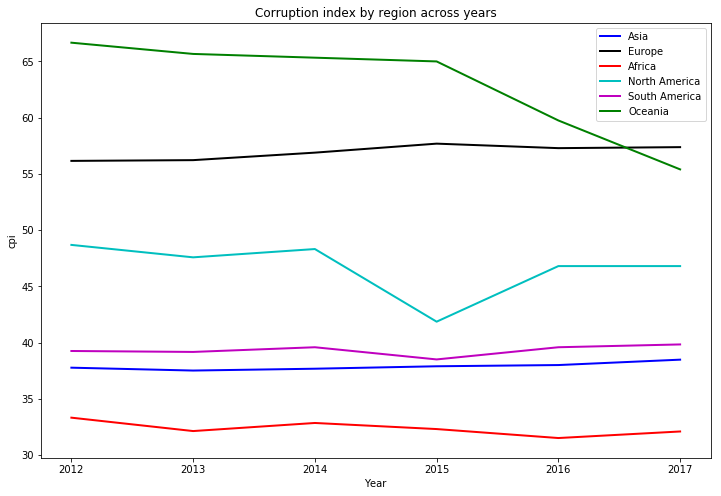

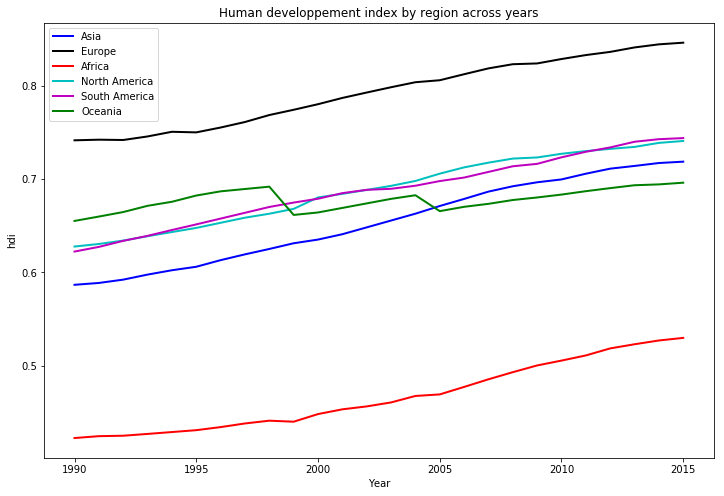

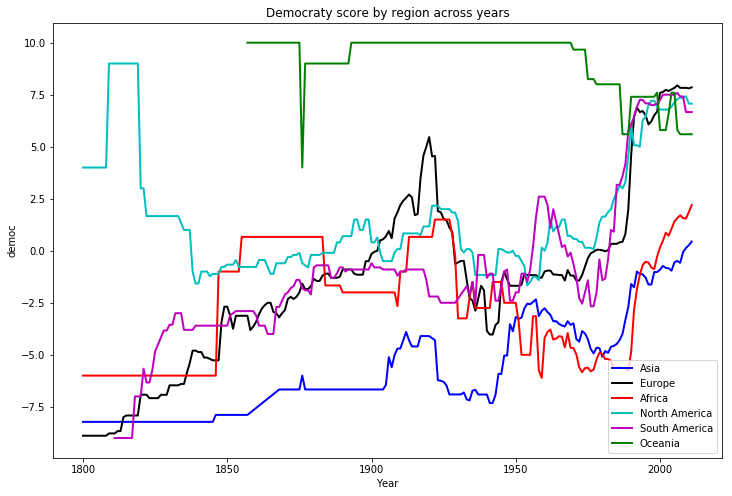

In [179]:
# list of indexes we want to draw
indexes =['cpi','hdi','democ']
indexes_titles = ['Corruption index', 'Human developpement index','Democraty score']        
for i in range(len(indexes)):   
     title =  indexes_titles[i] + ' by region across years'
     plot_mean_indexes_by_region(indics_df,indexes[i],title)

> **Comment 1**: In the corruption perception index, higher values indicate less corruption. We observe that the corruption in the Ocenia and Africa continents are the lowest and the highest respectively, relative to the others continent. Europe has kept a low corruption over the years. There is no a clear trend here.

> **Comment 2**:  Human devloppement index grows over years in all regions. However, on one hand there is a significant gap between Europe and Africa trends and between Europe and America and Ocenia in other hand. 

> **Comment 3**: As for democracy, we first note that the data exist since the year 1800. We observe a very low democracy in the 17th century, for all regions except Oceania and Asia. At the beginning of the 18th century, the values of the index have improved, but they come back to decrease in the second quarter of the century. From the middle of the 18th century until today, a growing slope is observed.

### Question2: The region that is witnessing the most to interpersonal violence?  

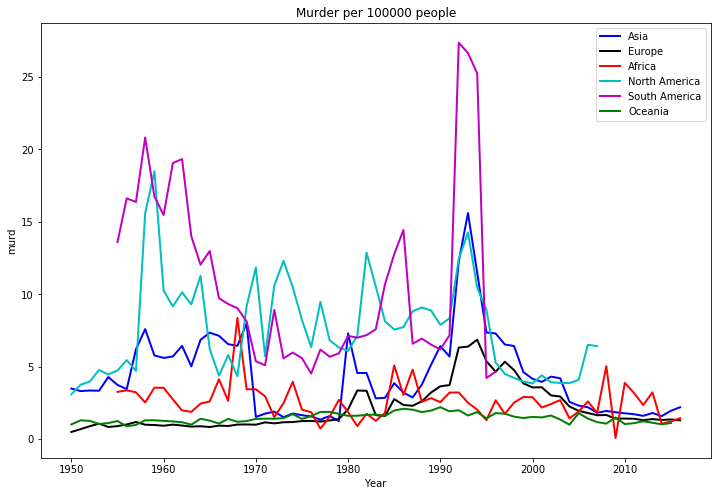

In [180]:
plot_mean_indexes_by_region(indics_df,'murd','Murder per 100000 people')

> **Comment**: As for murders per 100000 people, we can see somes peaks across the years but the most observable peaks are  at 1958 in North and South America (Lebanon crisis), at 1986 in South America (Surinamese Interior War), and at 1993 in North/South America, Europe and Asia (a number of conflits in the world). As we can see line plot of North America witnessing a lot of peaks.

### Question 3: How gdp grows over years by region


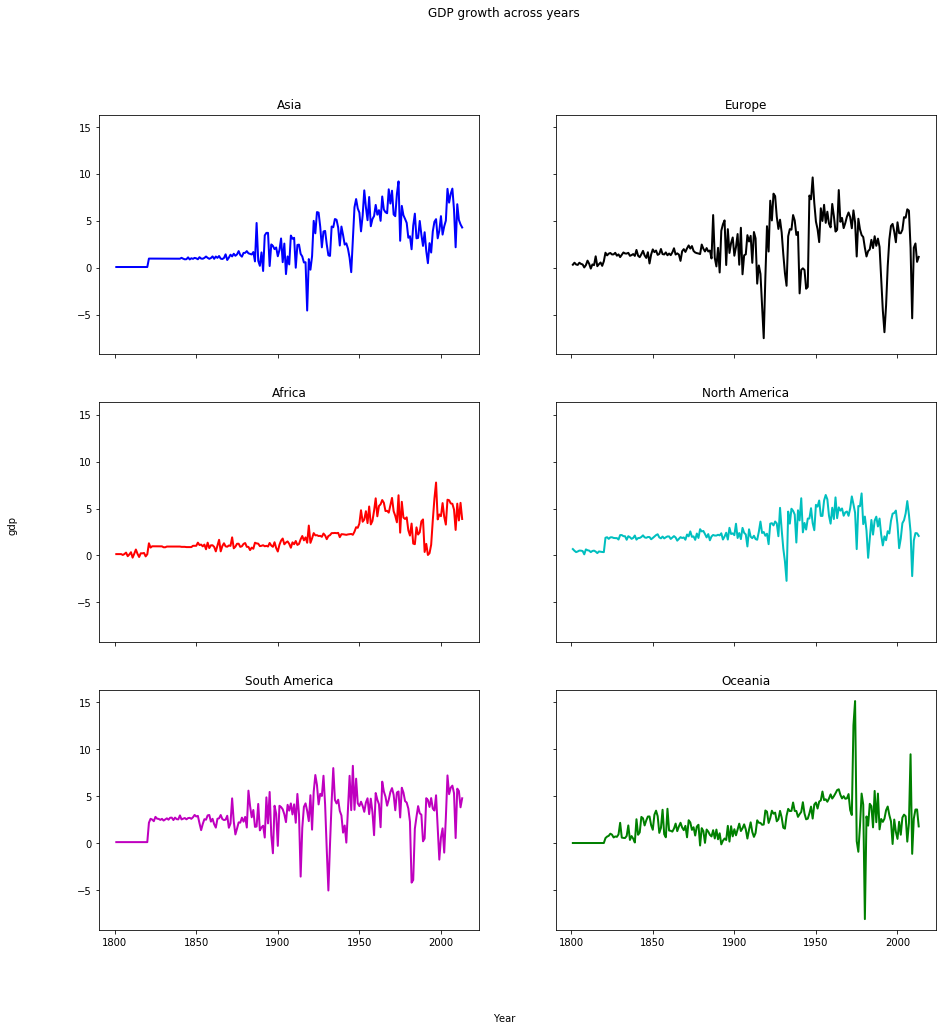

In [181]:
plot_subplot_by_region(indics_df,'gdp','GDP growth across years')

> **Comment**: What can be observed is that GDP since the beginning of the 18th century has fluctuated widely in all corners of the world. We do not see a clear trend. We see more peaks down than up.

### Question 4:  The region/country most spending on armaments.

In [314]:
# The region most spending on armaments
mean_militexp_by_country = indics_df.groupby(['Continent']).militexp.mean()
max_militexp = mean_militexp_by_country.max()
mean_militexp_by_country[mean_militexp_by_country == max_militexp]

Continent
Asia    4.613587
Name: militexp, dtype: float64

In [316]:
# The country most spending on armaments
mean_militexp_by_country = indics_df.groupby(['Country']).militexp.mean()
max_militexp = mean_militexp_by_country.max()
mean_militexp_by_country[mean_militexp_by_country == max_militexp]

Country
Eritrea    23.845455
Name: militexp, dtype: float64

> **Comment**: this index represente all current and capital expenditures on the armed forces. It is cut off from GDP. Results show that Asia and Eritrea (from Africa) are the region and country most spending on armaments, respectively. Bar charts below show mean value over years of this index for each country. We plot bar chart of each region separately, to be able to read the information on the axes.

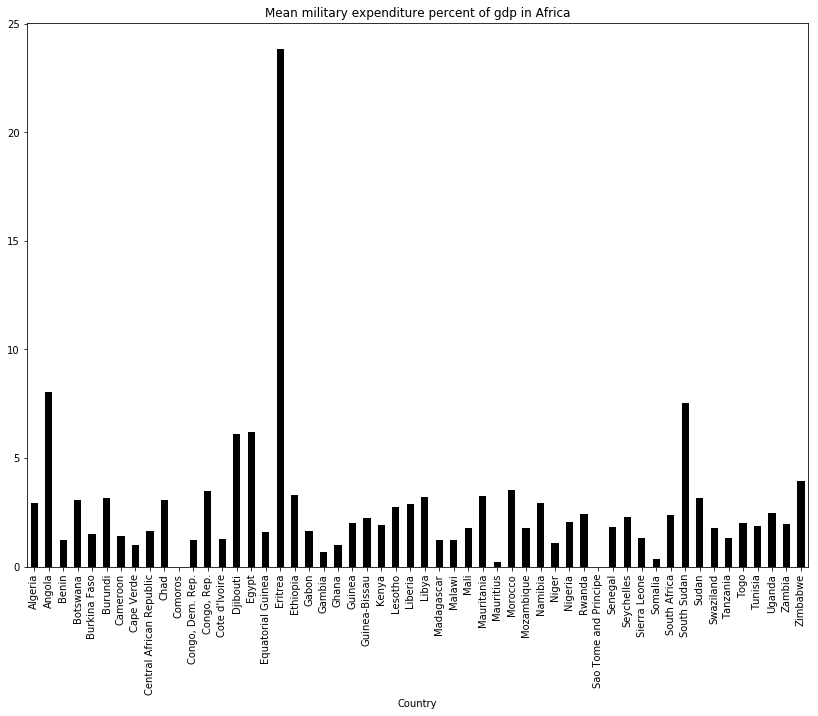

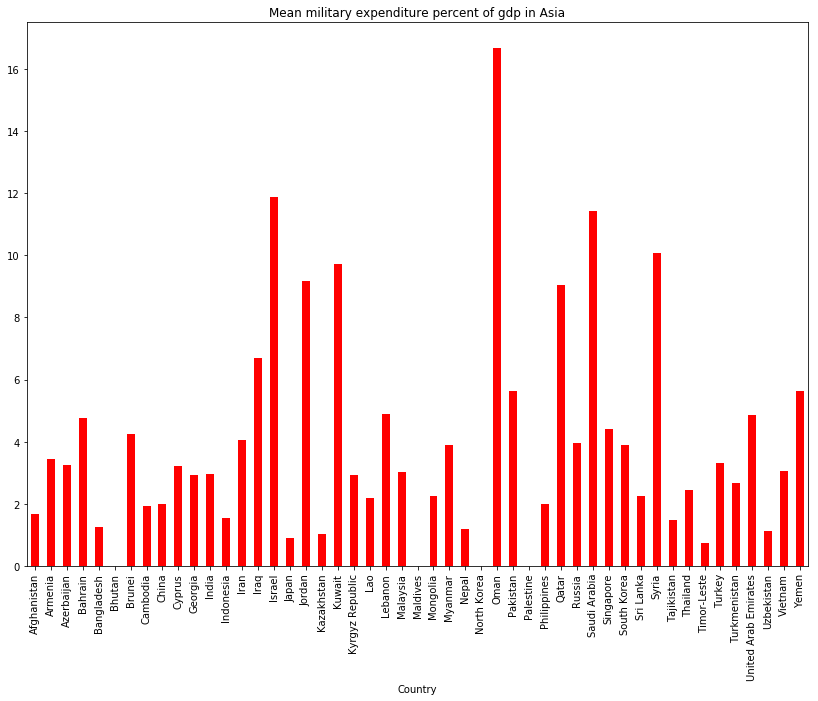

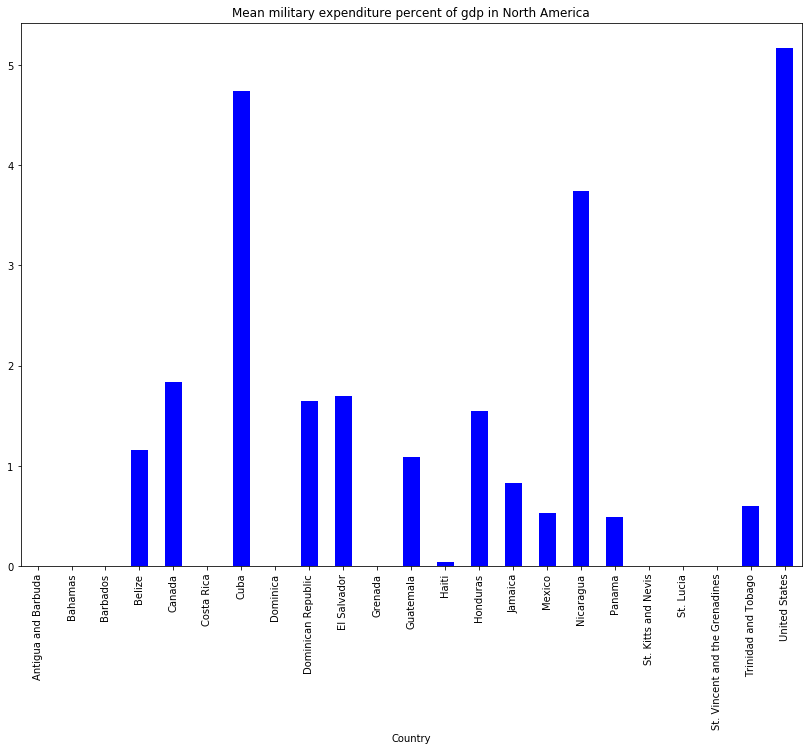

In [142]:
bar_plot_by_region(indics_df,'Africa','militexp','Mean military expenditure percent of gdp')
bar_plot_by_region(indics_df,'Asia','militexp','Mean military expenditure percent of gdp')
bar_plot_by_region(indics_df,'North America','militexp','Mean military expenditure percent of gdp')

### Question 5:  Is there any correlation between corruption perception and Human developpement indexes?

In [144]:
# Compute general correlation between cpi and hdi indexes
indics_df.loc[:,['cpi','hdi']].corr()


,cpi,hdi
cpi,1.000000,0.708453
hdi,0.708453,1.000000


In [147]:
# Compute correlation between cpi and hdi indexes in a given region/continent
indics_df.query('Continent == "Africa"').loc[:,['cpi','hdi']].corr()

,cpi,hdi
cpi,1.000000,0.495592
hdi,0.495592,1.000000


In [145]:
# Compute correlation between cpi and hdi indexes in a given country
indics_df.query('Country == "Algeria"').loc[:,['cpi','hdi']].corr()

,cpi,hdi
cpi,1.00000,0.87831
hdi,0.87831,1.00000


In [154]:
# Compute correlation between cpi and hdi indexes in a given country
indics_df.query('Country == "Morocco"').loc[:,['cpi','hdi']].corr()

,cpi,hdi
cpi,1.000000,0.068483
hdi,0.068483,1.000000


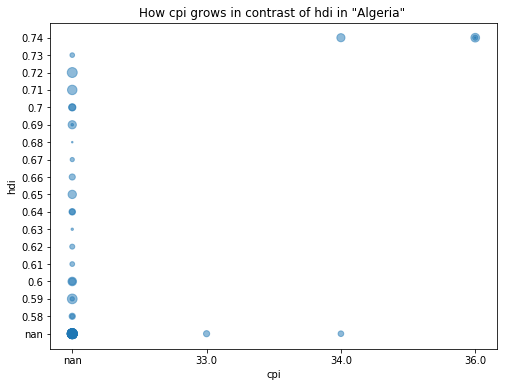

In [143]:
scatter_plot(indics_df,'"Algeria"','cpi','hdi','How cpi grows in contrast of hdi')

> **Comment**: Correlation coefficient can be used to measure the linear relationship between two variables. The range of values for the correlation coefficient is -1.0 to 1.0. A correlation of -1.0 indicates a perfect negative correlation, and a correlation of 1.0 indicates a perfect positive correlation. A value of zero indicates that there is no relationship between the two variables.


> As can we see by the calculation results above, the coefficient correlation coefficien value between cpi and hdi indexes in all regions together is 0.708453. That is, when hdi improves corruption decreases (its index value increase) We can say that there is a strong positive correlation between these two indexes. In the Africa this coefficient equal to 0.495592, that is, the two indexes move in the same direction. In the African countries Algeria and Morocco, there is a strong linear relationship between the two indexes, however there is no relationship between them in Morocco. Scatter char show by the last values the positive trend, .

### Question 6: Is there any correlation between Human developpement index and Murder per 100000 people?

In [156]:
# Compute general correlation between murd and hdi indexes
indics_df.loc[:,['hdi','murd']].corr()

,hdi,murd
hdi,1.000000,-0.493793
murd,-0.493793,1.000000


In [168]:
# Compute correlation between cpi and hdi indexes in a given region/continent
indics_df.query('Continent == "Europe"').loc[:,['murd','hdi']].corr()

,murd,hdi
murd,1.000000,-0.588425
hdi,-0.588425,1.000000


In [169]:
# Compute correlation between cpi and hdi indexes in a given country
indics_df.query('Country == "Sweden"').loc[:,['murd','hdi']].corr()


,murd,hdi
murd,1.000000,-0.787399
hdi,-0.787399,1.000000


In [171]:
# Compute correlation between cpi and hdi indexes in a given country
indics_df.query('Country == "France"').loc[:,['murd','hdi']].corr()

,murd,hdi
murd,1.000000,-0.914421
hdi,-0.914421,1.000000


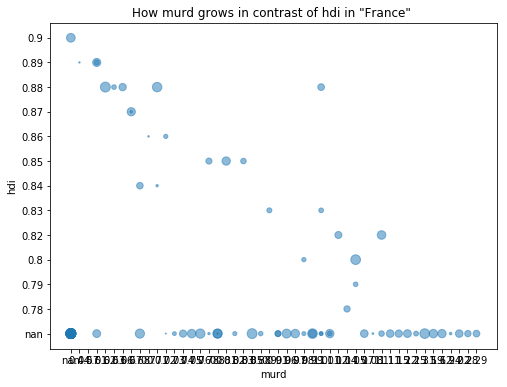

In [207]:
scatter_plot(indics_df,'"France"','murd','hdi','How murd grows in contrast of hdi')

> **Comment**: As can we see by the calculation results above, the coefficient correlation value between murder (Mortality due to interpersonal violence, per 100 000 standard population) and hdi indexes in all regions together is -0.493793. We can say that there is a negative correlation between these two indexes. That is, when hdi improves murder decreases. In the Europe this coefficient equal to -0.588425, that is, the two indexes move in the opposite direction. In the European countries France and Sweden, there is a very strong negative linear relationship between the two indexes with coeeficient value of -0.914421 and -0.787399 respectively. Scatter char show clearly the negative trend.

### Question 7:  Is there equality, equity and justice in education?  How mean years in school for men 25 years and older grows in contrast of women 25 years and older 

In [204]:
# Compute general correlation between years_in_school_men and years_in_school_women indexes
print(' In the world \n',indics_df.loc[:,['years_in_school_m', 'years_in_school_w']].corr(), '\n')
regions = indics_df.Continent.unique()
for i in range(len(regions)):
    print(' In {} \n'.format(regions[i]),indics_df.query('Continent == "{}"'.format(regions[i])).loc[:,['years_in_school_m', 'years_in_school_w']].corr(),'\n')

 In the world 
                    years_in_school_m  years_in_school_w
years_in_school_m           1.000000           0.971707
years_in_school_w           0.971707           1.000000 

 In Asia 
                    years_in_school_m  years_in_school_w
years_in_school_m           1.000000           0.973357
years_in_school_w           0.973357           1.000000 

 In Europe 
                    years_in_school_m  years_in_school_w
years_in_school_m           1.000000           0.967928
years_in_school_w           0.967928           1.000000 

 In Africa 
                    years_in_school_m  years_in_school_w
years_in_school_m           1.000000           0.867805
years_in_school_w           0.867805           1.000000 

 In North America 
                    years_in_school_m  years_in_school_w
years_in_school_m           1.000000           0.994972
years_in_school_w           0.994972           1.000000 

 In South America 
                    years_in_school_m  years_in_school_w
y

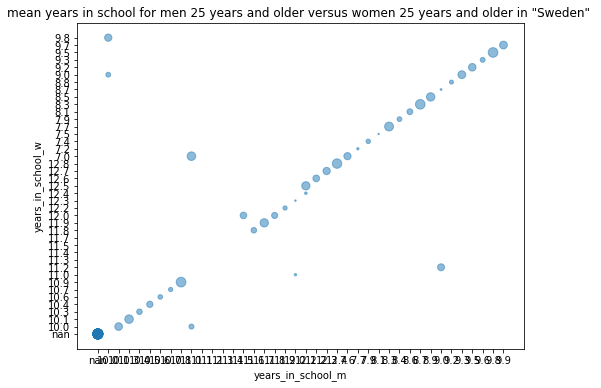

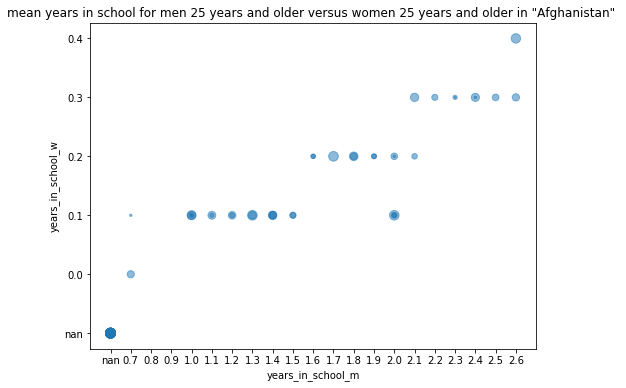

In [200]:
countries =['"Sweden"','"Afghanistan"']
scatter_title = 'mean years in school for men 25 years and older versus women 25 years and older'
for i in range(len(countries)):   
    scatter_plot(indics_df,countries[i], 'years_in_school_m', 'years_in_school_w', scatter_title )

> **Comment**: Statistics as well scatter charts show a strong positive correlation between mean years in school for men and women in the world. The correlation coefficient values going from 0.867805 in Africa to 0.973357 in Asia.

> In **Sweden** scatter chart, we see a clear positive trend. However, there are times when the number of mean years in school for men was greater than that for women. This imbalance is very evident in َ **Afghanistan** scatter chart. Sweden chart looks like an elevator while  َAfghanistan chart looks like a staircase. 

### Question 8: How mean years in school for men 25 years and older grows in contrast of Human developement?

In [205]:
# Compute general correlation between years_in_school_m and hdi indexes
indics_df.loc[:,['years_in_school_m','hdi']].corr()

,years_in_school_m,hdi
years_in_school_m,1.000000,0.850663
hdi,0.850663,1.000000


> **Comment**: As we can see there is a strong positive correlation beween education and human develpment index.

<a id='conclusions'></a>
## Conclusions

> It was found that the corruption is almost stable in the different regions. Keeping in mind that few data are available for this index, we note that there is a gap in this index between Europe and Oceania in one hand and the other regions in other hand. 

> There is a clear trend to move toward a better life, due to the continuous rise of the human development index

> Starting in 1990, we see a see a significant improvement in democracy throughout the world.

> The region that is witnessing the most to interpersonal violence is South America, come after North America.
> It was found that there is a strong negative correlation between Human development index and Mortality due to interpersonal violence, per 100 000 standard population. And there is a strong positive correlation between Human development index and mean years in school for men/women.  These results are logic. 

> About Equality, equity and justice in educationة there is a strong positive correlation between mean years in school for men and mean years in school for women in the world. The correlation coefficient values going from 0.867805 in Africa to 0.973357 in Asia. This result is justified too,  given the continent's history of slavery and colonialism.

 #### LIMITATION: 

> Some indexes or measures don't contain enough data to give a confident judgment. For instance, we have only the data of the 6 last years for the corruption perception index. 

> The indexes data is a little complete on the developed countries, it is not the case for the third world countries, where we see a lot of NaN. These non_values prevent to present a correct analysis. However, the absence of the data in itself gives us an estimate of how these pepole in these countries live.

> The question now arises: even in the case of complete data, can we give a correct judgments about the results we get? 

## Submitting your Project 


In [206]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

In [ ]:
!tar chvfz notebook.tar.gz *